Dataset Shape: 38 matches, 13 columns
Columns: ['Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Equipe_type']

First 5 matches preview:
         Date   Time        Round  Day  Venue Result  GF  GA        Opponent  \
0  17.08.2024  21:30  Matchweek 1  Sat      1      W   2   1        Valencia   
1  24.08.2024  19:00  Matchweek 2  Sat      0      W   2   1   Athletic Club   
2  27.08.2024  21:30  Matchweek 3  Tue      1      W   2   1  Rayo Vallecano   
3  31.08.2024  17:00  Matchweek 4  Sat      0      W   7   0      Valladolid   
4  15.09.2024  16:15  Matchweek 5  Sun      1      W   4   1          Girona   

    xG  xGA  Poss  Equipe_type  
0  3,2    1    63            0  
1  1,8    1    64            1  
2  1,4  0,4    64            1  
3  4,7  0,5    70            1  
4  1,9  1,3    55            1  

----------------------------------------
Results distribution
----------------------------------------
W    28
L     6
D     4
Name: Re

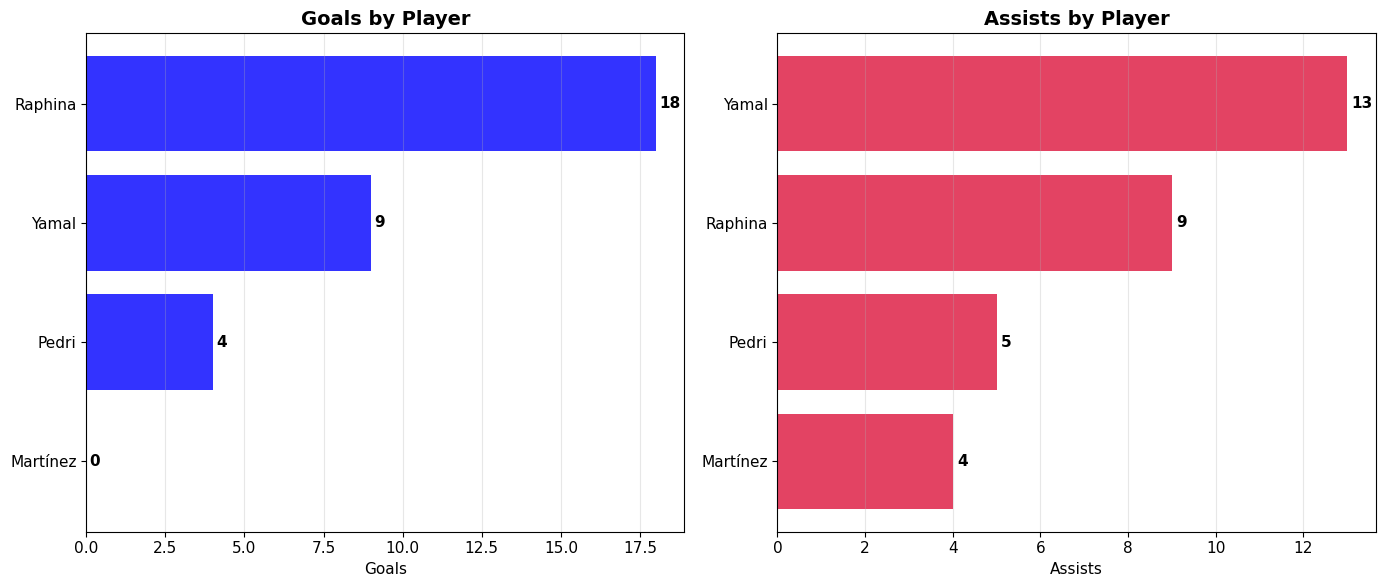

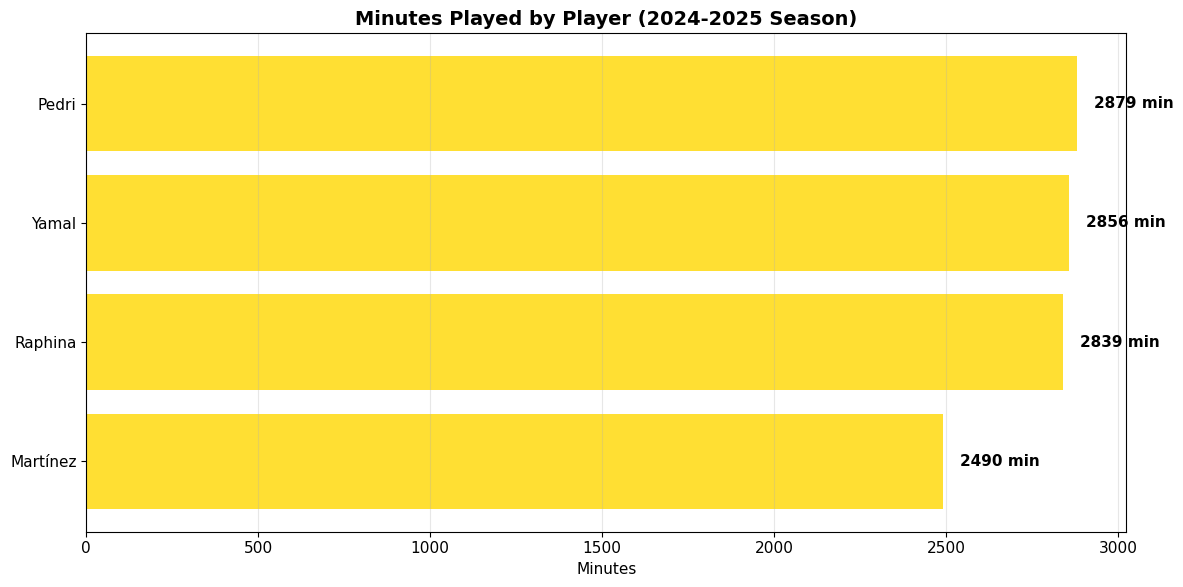

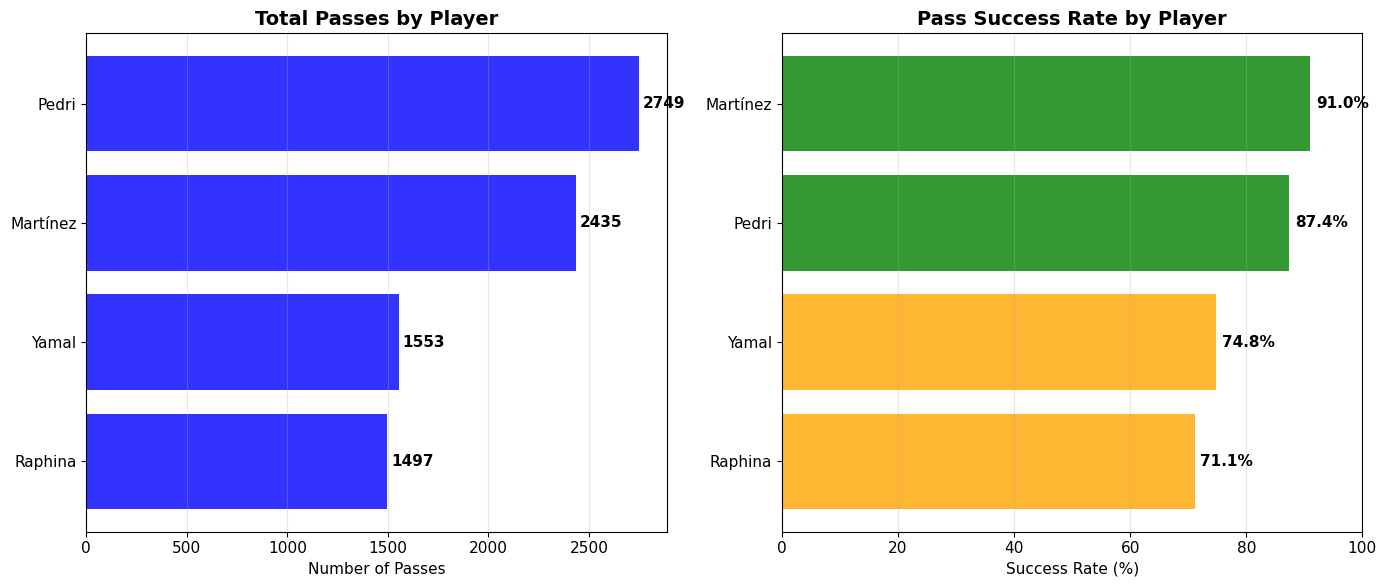

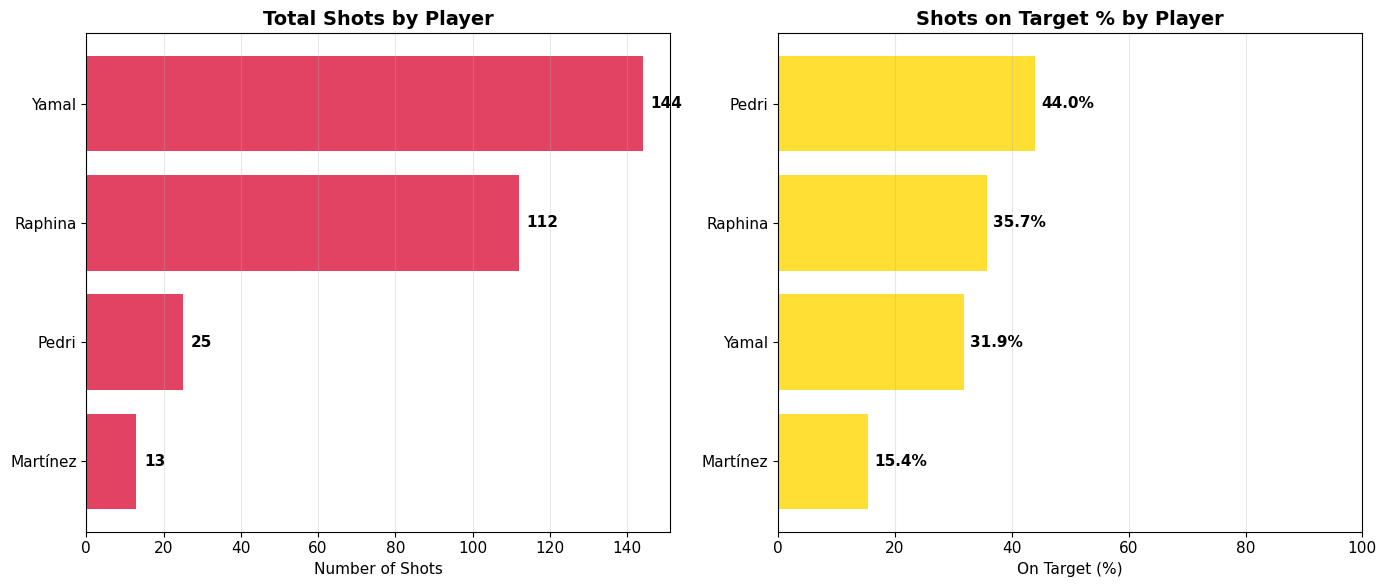

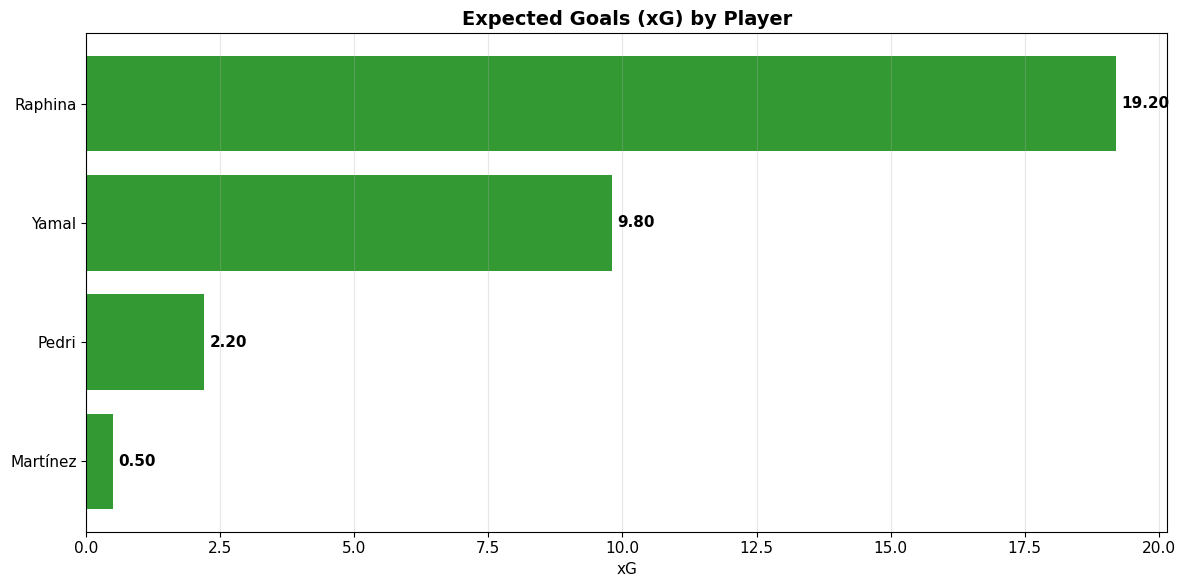

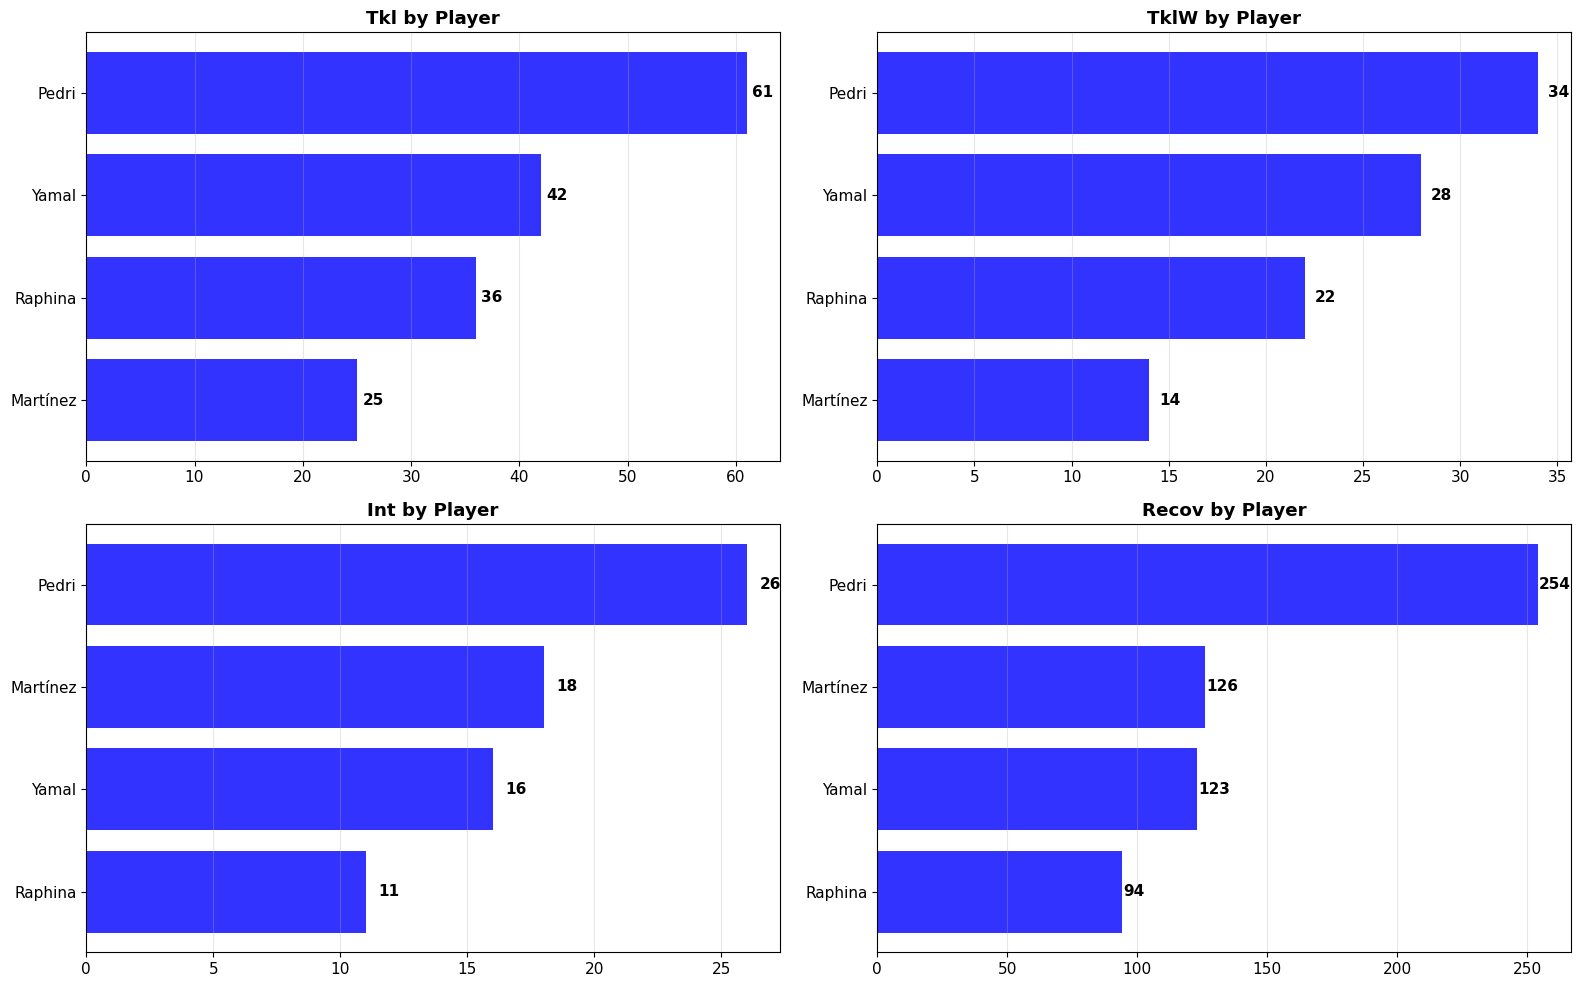

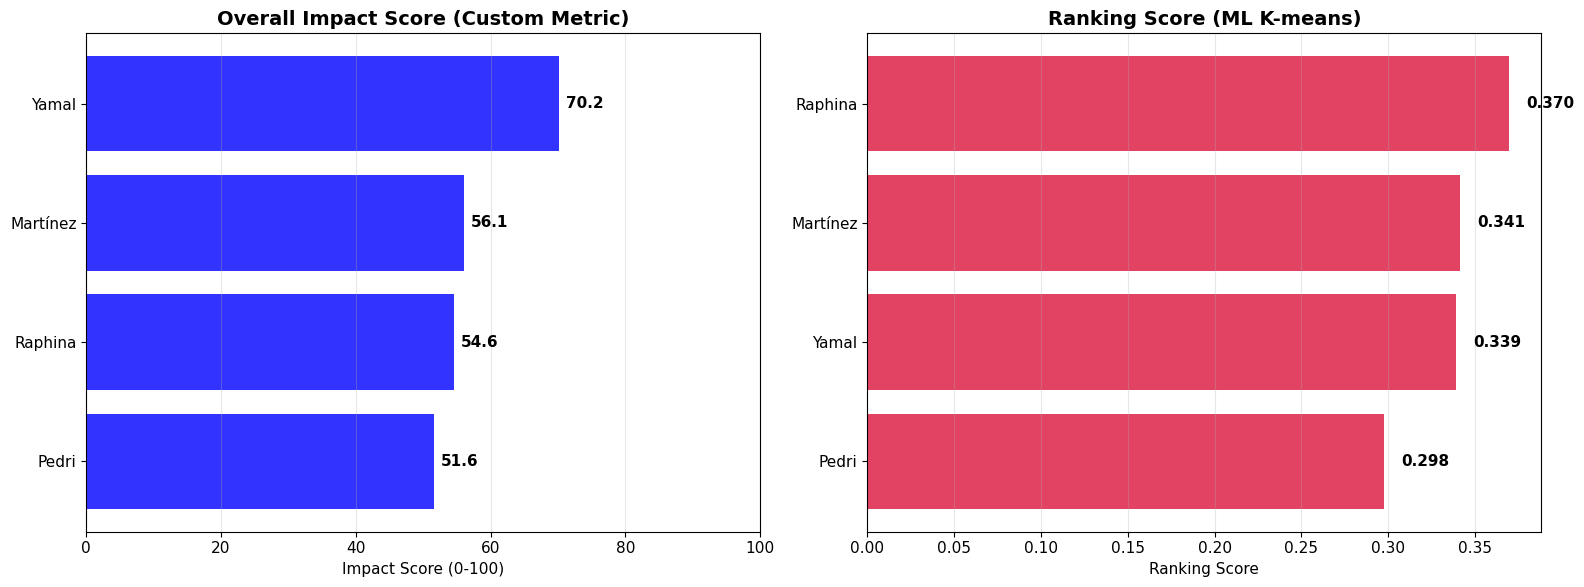

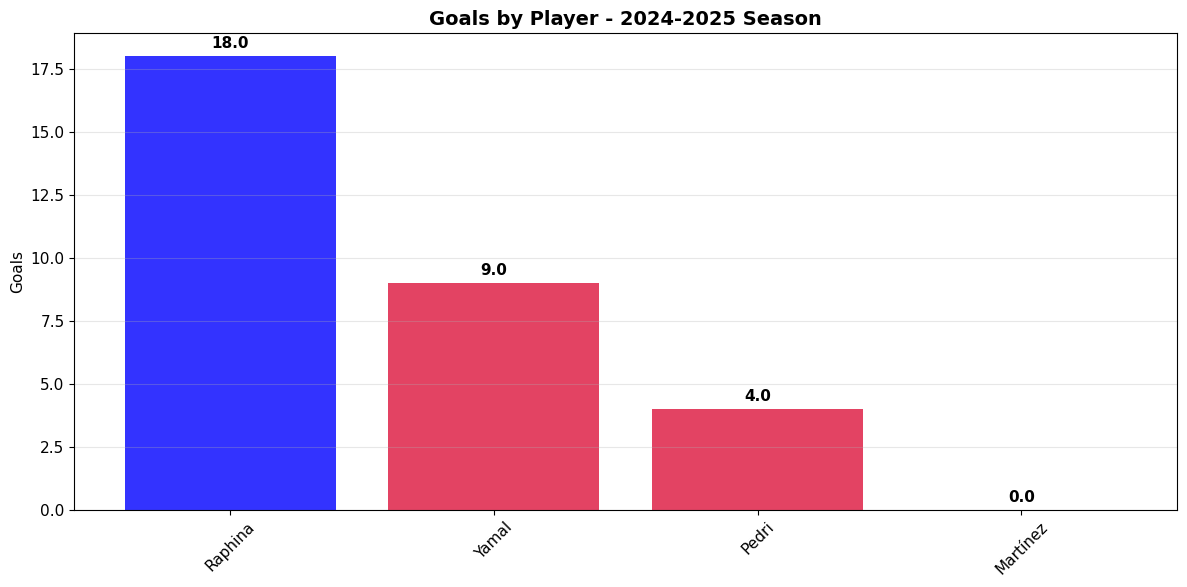

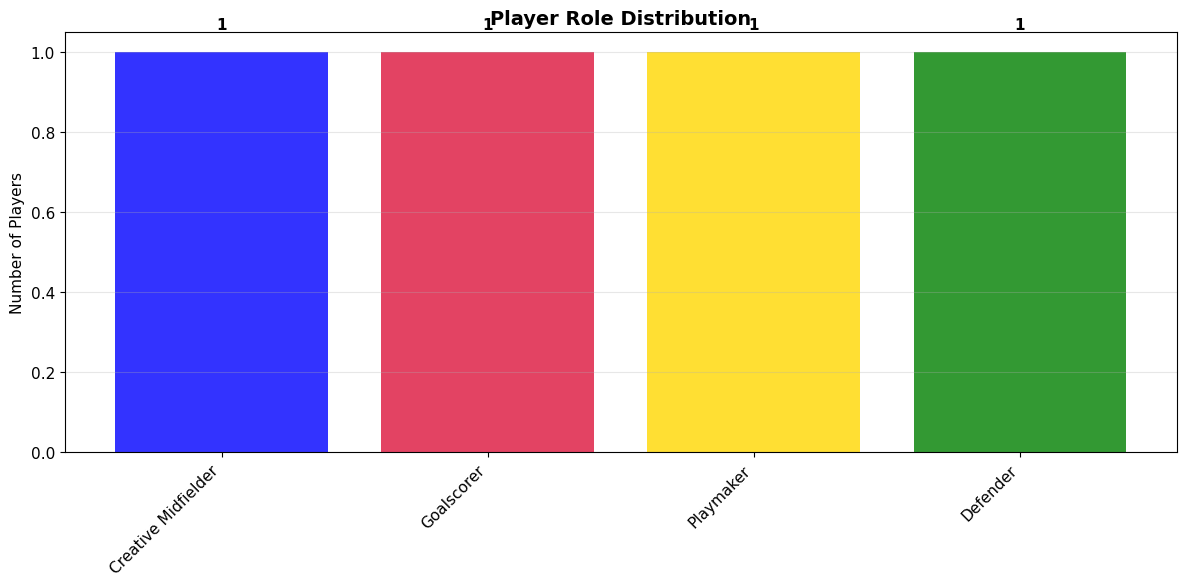


Creative Midfielder:
----------------------------------------
  - Pedri
    Impact Score: 51.6
    ML Ranking Score: 0.298

Goalscorer:
----------------------------------------
  - Raphina
    Impact Score: 54.6
    ML Ranking Score: 0.370

Playmaker:
----------------------------------------
  - Yamal
    Impact Score: 70.2
    ML Ranking Score: 0.339

Defender:
----------------------------------------
  - Martínez
    Impact Score: 56.1
    ML Ranking Score: 0.341



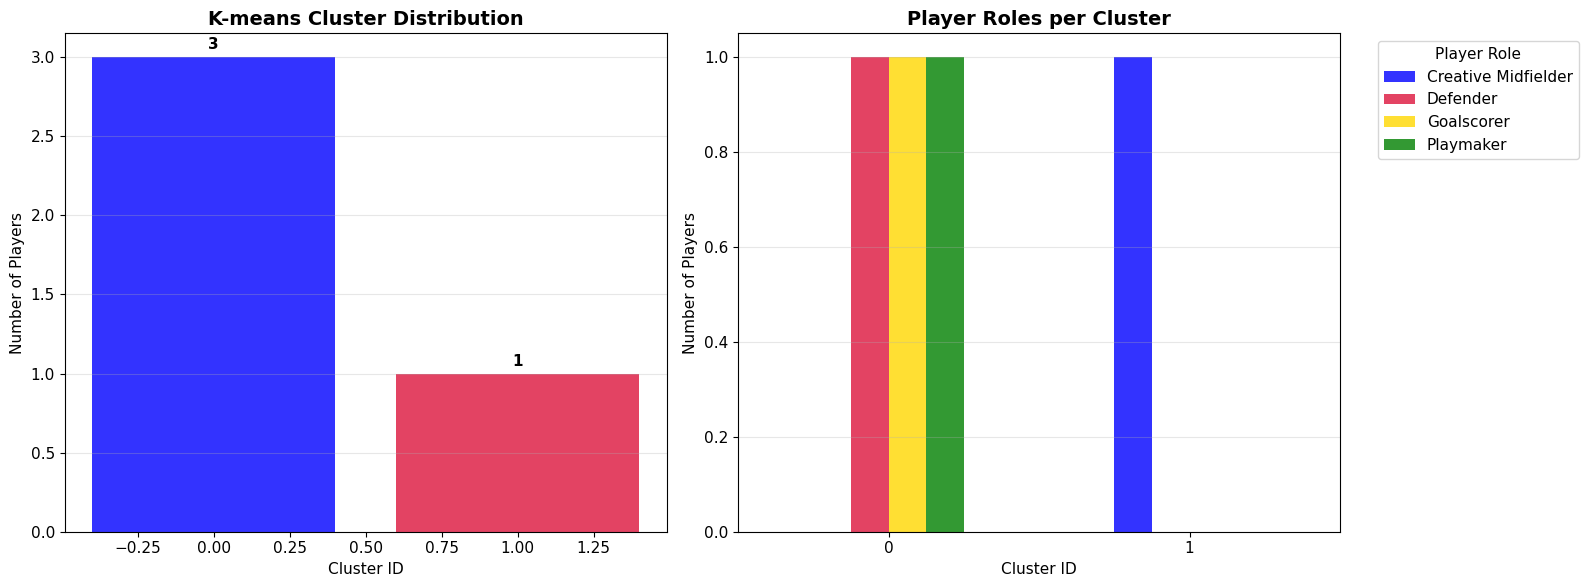

In [16]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys
sys.path.append('/files/Projet_Barca/Src/')
sys.path.append('/files/Projet_Barca/Src/Analysis/')
sys.path.append('/files/Projet_Barca/Src/ML/')

from Team_Data_Loader import load_team_data, load_raw_key_players_data, clear_key_player_data
from Analysis_key_player import create_advanced_measures, get_player_statistics_summary, display_all_new_metrics, final_data_formatting, calculate_impact_score, classify_player_role
from ML_Key_Player import kmeans_clustering_analysis, KMeansClustering


OUTPUT_DIR = 'Graphics_Output'
os.makedirs(OUTPUT_DIR, exist_ok=True)


def setup_visualization_style():
    
    
    plt.style.use('default')
    sns.set_palette(["blue", "crimson", "gold", "green"])
    plt.rcParams['figure.figsize'] = (14, 8)
    plt.rcParams['font.size'] = 11


def plot_player_goals_assists(players_df):
    
    setup_visualization_style()
    
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    
    goals_data = players_df.sort_values('Goals', ascending=True)
    ax1.barh(goals_data['Players'], goals_data['Goals'], color='blue', alpha=0.8)
    ax1.set_title('Goals by Player', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Goals')
    ax1.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(goals_data['Goals']):
        ax1.text(v + 0.1, i, str(int(v)), va='center', fontweight='bold')
    

    assists_data = players_df.sort_values('Assists', ascending=True)
    ax2.barh(assists_data['Players'], assists_data['Assists'], color='crimson', alpha=0.8)
    ax2.set_title('Assists by Player', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Assists')
    ax2.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(assists_data['Assists']):
        ax2.text(v + 0.1, i, str(int(v)), va='center', fontweight='bold')
    
    plt.tight_layout()
    
   
    filepath = os.path.join(OUTPUT_DIR, '01_player_goals_assists.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    
    plt.show()


def plot_player_minutes(players_df):
    
    setup_visualization_style()
    
    
    
    minutes_data = players_df.sort_values('Min', ascending=True)
    
    plt.figure(figsize=(12, 6))
    bars = plt.barh(minutes_data['Players'], minutes_data['Min'], color='gold', alpha=0.8)
    
    plt.title('Minutes Played by Player (2024-2025 Season)', fontweight='bold', fontsize=14)
    plt.xlabel('Minutes')
    plt.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(minutes_data['Min']):
        plt.text(v + 50, i, f'{int(v)} min', va='center', fontweight='bold')
    
    plt.tight_layout()
    
    
    filepath = os.path.join(OUTPUT_DIR, '02_player_minutes.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
 
    plt.show()


def plot_player_passing_stats(players_df):
    
    setup_visualization_style()
    
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Total passes
    pass_data = players_df.sort_values('Pass', ascending=True)
    ax1.barh(pass_data['Players'], pass_data['Pass'], color='blue', alpha=0.8)
    ax1.set_title('Total Passes by Player', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Number of Passes')
    ax1.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(pass_data['Pass']):
        ax1.text(v + 20, i, str(int(v)), va='center', fontweight='bold')
    
    # Pass success rate
    success_data = players_df.sort_values('Succes_P%', ascending=True)
    colors = ['green' if x > 80 else 'orange' if x > 70 else 'red' for x in success_data['Succes_P%']]
    ax2.barh(success_data['Players'], success_data['Succes_P%'], color=colors, alpha=0.8)
    ax2.set_title('Pass Success Rate by Player', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Success Rate (%)')
    ax2.set_xlim(0, 100)
    ax2.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(success_data['Succes_P%']):
        ax2.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')
    
    plt.tight_layout()
    
    
    filepath = os.path.join(OUTPUT_DIR, '03_player_passing_stats.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
  
    plt.show()


def plot_player_shooting_stats(players_df):
    
    setup_visualization_style()
    
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    shots_data = players_df.sort_values('Shots', ascending=True)
    ax1.barh(shots_data['Players'], shots_data['Shots'], color='crimson', alpha=0.8)
    ax1.set_title('Total Shots by Player', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Number of Shots')
    ax1.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(shots_data['Shots']):
        ax1.text(v + 2, i, str(int(v)), va='center', fontweight='bold')
    
    
    target_data = players_df.sort_values('Sot%', ascending=True)
    ax2.barh(target_data['Players'], target_data['Sot%'], color='gold', alpha=0.8)
    ax2.set_title('Shots on Target % by Player', fontweight='bold', fontsize=14)
    ax2.set_xlabel('On Target (%)')
    ax2.set_xlim(0, 100)
    ax2.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(target_data['Sot%']):
        ax2.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')
    
    plt.tight_layout()
    
   
    filepath = os.path.join(OUTPUT_DIR, '04_player_shooting_stats.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    
    plt.show()


def plot_player_xg_stats(players_df):
    """Plot expected goals statistics by player"""
    setup_visualization_style()
    
    
    
    xg_data = players_df.sort_values('xG', ascending=True)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    bars = ax.barh(xg_data['Players'], xg_data['xG'], color='green', alpha=0.8)
    ax.set_title('Expected Goals (xG) by Player', fontweight='bold', fontsize=14)
    ax.set_xlabel('xG')
    ax.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(xg_data['xG']):
        ax.text(v + 0.1, i, f'{v:.2f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    
    filepath = os.path.join(OUTPUT_DIR, '05_player_xg_stats.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
   
    plt.show()


def plot_player_defensive_stats(players_df):
   
    setup_visualization_style()
    
    defensive_cols = ['Tkl', 'TklW', 'Int', 'Recov']
    available_cols = [col for col in defensive_cols if col in players_df.columns]
    
    
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(available_cols):
        if idx < 4:
            data = players_df.sort_values(col, ascending=True)
            axes[idx].barh(data['Players'], data[col], color='blue', alpha=0.8)
            axes[idx].set_title(f'{col} by Player', fontweight='bold')
            axes[idx].grid(True, alpha=0.3, axis='x')
            
            for i, v in enumerate(data[col]):
                axes[idx].text(v + 0.5, i, f'{int(v)}', va='center', fontweight='bold')
    
    # Hide unused subplots
    for idx in range(len(available_cols), 4):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    
   
    filepath = os.path.join(OUTPUT_DIR, '06_player_defensive_stats.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    
    plt.show()


def plot_player_comparison(players_df, metric='Goals'):
    
    setup_visualization_style()
    
    
    
    data = players_df.sort_values(metric, ascending=False)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    colors = ['blue' if x == data[metric].max() else 'crimson' for x in data[metric]]
    bars = ax.bar(data['Players'], data[metric], color=colors, alpha=0.8)
    
    ax.set_title(f'{metric} by Player - 2024-2025 Season', fontweight='bold', fontsize=14)
    ax.set_ylabel(metric)
    ax.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=45)
    
    for bar, v in zip(bars, data[metric]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    
    
    filepath = os.path.join(OUTPUT_DIR, f'07_player_comparison_{metric.lower()}.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    
    plt.show()


def plot_player_overall_stats(players_df):
    
    setup_visualization_style()
    
    
    
    for idx, row in players_df.iterrows():
        player_name = row['Players']
        print(f"\n{player_name}:")
        print("-" * 40)
        
        if 'Goals' in players_df.columns:
            print(f"  Goals: {int(row['Goals'])}")
        if 'Assists' in players_df.columns:
            print(f"  Assists: {int(row['Assists'])}")
        if 'Min' in players_df.columns:
            print(f"  Minutes: {int(row['Min'])}")
        if 'Shots' in players_df.columns:
            print(f"  Shots: {int(row['Shots'])}")
        if 'Pass' in players_df.columns:
            print(f"  Passes: {int(row['Pass'])}")
        if 'Succes_P%' in players_df.columns:
            print(f"  Pass Success: {row['Succes_P%']:.1f}%")
        if 'xG' in players_df.columns:
            print(f"  xG: {row['xG']:.2f}")
    
   
def plot_impact_score_comparison(players_df):
    
    setup_visualization_style()
    
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    
    impact_data = players_df.sort_values('Overall_Impact_Score', ascending=True)
    ax1.barh(impact_data['Players'], impact_data['Overall_Impact_Score'], color='blue', alpha=0.8)
    ax1.set_title('Overall Impact Score (Custom Metric)', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Impact Score (0-100)')
    ax1.set_xlim(0, 100)
    ax1.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(impact_data['Overall_Impact_Score']):
        ax1.text(v + 1, i, f'{v:.1f}', va='center', fontweight='bold')
    
    
    ranking_data = players_df.sort_values('Ranking_Score', ascending=True)
    ax2.barh(ranking_data['Players'], ranking_data['Ranking_Score'], color='crimson', alpha=0.8)
    ax2.set_title('Ranking Score (ML K-means)', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Ranking Score')
    ax2.grid(True, alpha=0.3, axis='x')
    
    for i, v in enumerate(ranking_data['Ranking_Score']):
        ax2.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    
   
    filepath = os.path.join(OUTPUT_DIR, '08_impact_score_comparison.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    
    plt.show()



def plot_ml_clustering_visualization(players_df):
    
    setup_visualization_style()
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
  
    cluster_counts = players_df['KMeans_Cluster'].value_counts().sort_index()
    colors_cluster = ['blue', 'crimson', 'gold', 'green'][:len(cluster_counts)]
    ax1.bar(cluster_counts.index, cluster_counts.values, color=colors_cluster, alpha=0.8)
    ax1.set_title('K-means Cluster Distribution', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Cluster ID')
    ax1.set_ylabel('Number of Players')
    ax1.grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(cluster_counts.values):
        ax1.text(i, v + 0.05, str(v), ha='center', fontweight='bold')
  
    if 'Player_Role' in players_df.columns:
        cluster_role = pd.crosstab(players_df['KMeans_Cluster'], players_df['Player_Role'])
        cluster_role.plot(kind='bar', ax=ax2, color=['blue', 'crimson', 'gold', 'green', 'purple'][:len(cluster_role.columns)], alpha=0.8)
        ax2.set_title('Player Roles per Cluster', fontweight='bold', fontsize=14)
        ax2.set_xlabel('Cluster ID')
        ax2.set_ylabel('Number of Players')
        ax2.legend(title='Player Role', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(True, alpha=0.3, axis='y')
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)
    
    plt.tight_layout()
    
   
    filepath = os.path.join(OUTPUT_DIR, '09_ml_clustering_visualization.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')

    plt.show()


def plot_player_role_analysis(players_df):
  
    setup_visualization_style()
    
    
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    role_counts = players_df['Player_Role'].value_counts()
    colors = ['blue', 'crimson', 'gold', 'green', 'purple'][:len(role_counts)]
    
    bars = ax.bar(range(len(role_counts)), role_counts.values, color=colors, alpha=0.8)
    ax.set_xticks(range(len(role_counts)))
    ax.set_xticklabels(role_counts.index, rotation=45, ha='right')
    ax.set_title('Player Role Distribution', fontweight='bold', fontsize=14)
    ax.set_ylabel('Number of Players')
    ax.grid(True, alpha=0.3, axis='y')
    
    for bar, v in zip(bars, role_counts.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                str(int(v)), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    
   
    filepath = os.path.join(OUTPUT_DIR, '10_player_role_analysis.png')
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    
    plt.show()
    
   
    print("=" * 70)
    for role in players_df['Player_Role'].unique():
        role_players = players_df[players_df['Player_Role'] == role]
        print(f"\n{role}:")
        print("-" * 40)
        for _, player in role_players.iterrows():
            print(f"  - {player['Players']}")
            if 'Overall_Impact_Score' in player:
                print(f"    Impact Score: {player['Overall_Impact_Score']:.1f}")
            if 'Ranking_Score' in player:
                print(f"    ML Ranking Score: {player['Ranking_Score']:.3f}")
    print("\n" + "=" * 70)


def create_key_players_dashboard(players_df):
  
    
    plot_player_overall_stats(players_df)
    
    
    if 'Goals' in players_df.columns and 'Assists' in players_df.columns:
        plot_player_goals_assists(players_df)
   
    if 'Min' in players_df.columns:
        plot_player_minutes(players_df)
    
    
    if 'Pass' in players_df.columns and 'Succes_P%' in players_df.columns:
        plot_player_passing_stats(players_df)
    
    if 'Shots' in players_df.columns and 'Sot%' in players_df.columns:
        plot_player_shooting_stats(players_df)
    
    
    if 'xG' in players_df.columns:
        plot_player_xg_stats(players_df)
    
   
    defensive_cols = ['Tkl', 'TklW', 'Int', 'Recov']
    if any(col in players_df.columns for col in defensive_cols):
        plot_player_defensive_stats(players_df)
    
    if 'Overall_Impact_Score' in players_df.columns and 'Ranking_Score' in players_df.columns:
        plot_impact_score_comparison(players_df)
        
    plot_player_comparison(players_df, metric='Goals')
    
    
    if 'Player_Role' in players_df.columns:
        plot_player_role_analysis(players_df)
    
    if 'KMeans_Cluster' in players_df.columns:
        plot_ml_clustering_visualization(players_df)
if __name__ == "__main__":
    
   
    team_df = load_team_data()
    players_raw_df = load_raw_key_players_data()
    player_clear_df = clear_key_player_data(players_raw_df)
    
    players_analyzed = create_advanced_measures(players_raw_df)
    
    players_final = final_data_formatting(players_analyzed)
    
    display = display_all_new_metrics(players_final)
    
    
    summary = get_player_statistics_summary(players_final)
    
   
    
    
    analyzer = kmeans_clustering_analysis(players_analyzed)
    results_df = analyzer.players_df
    impactful_player = analyzer.find_most_impactful()
    
    
    
    print("\nFinal cluster summary:")
    for cluster in sorted(results_df['KMeans_Cluster'].unique()):
        cluster_players = results_df[results_df['KMeans_Cluster'] == cluster]
        print(f"\nCluster {cluster}: {', '.join(cluster_players['Players'].tolist())}")
    
    
    
        
    
    
    create_key_players_dashboard(results_df)
    
    